In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\Pollo\Downloads\Crypto_historical_data.csv")

print(df.head())
print("--------------------------------------------")
print(df.info())

                        Date        Open        High         Low       Close  \
0  2020-12-23 00:00:00+00:00  594.087341  617.949280  564.958862  588.655334   
1  2020-12-24 00:00:00+00:00  588.686462  613.328125  551.784607  611.787476   
2  2020-12-25 00:00:00+00:00  611.759033  626.397217  600.420532  626.136230   
3  2020-12-26 00:00:00+00:00  626.150024  642.746277  610.427185  627.472473   
4  2020-12-27 00:00:00+00:00  627.465454  707.751221  617.719788  682.467163   

   Volume     ticker               name  
0   64860  STETH-USD  Lido Staked Ether  
1   53526  STETH-USD  Lido Staked Ether  
2   45601  STETH-USD  Lido Staked Ether  
3   10297  STETH-USD  Lido Staked Ether  
4   90078  STETH-USD  Lido Staked Ether  
--------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341415 entries, 0 to 341414
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Date    341415 non-null  object

In [9]:
print(df.shape)
print("-----------------------------------")
print(df.describe())
print("-----------------------------------")
print(df['ticker'].unique())

(341415, 8)
-----------------------------------
                Open          High            Low          Close        Volume
count  339721.000000  3.397210e+05  339721.000000  341415.000000  3.414150e+05
mean     1607.511252  1.641934e+03    1574.461968    1601.034090  2.525696e+09
std      9524.841943  9.704705e+03    9357.387603    9510.451248  2.761880e+11
min         0.000000  7.635980e-13      -1.217554       0.000000  0.000000e+00
25%         0.091721  9.674600e-02       0.086974       0.086852  6.552785e+05
50%         1.004190  1.019553e+00       0.999900       1.002844  2.277660e+07
75%        35.174072  3.685845e+01      33.448696      34.063301  2.019258e+08
max    124827.132812  2.364932e+05  123230.890625  124828.453125  8.325207e+13


In [11]:
print(df.isnull().sum())

Date         0
Open      1694
High      1694
Low       1694
Close        0
Volume       0
ticker       0
name         0
dtype: int64


In [13]:
df = df.dropna(subset=["Date", "Close", "ticker"])

df = df.sort_values(["ticker", "Date"])

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df["Return"] = df.groupby("ticker")["Close"].pct_change()

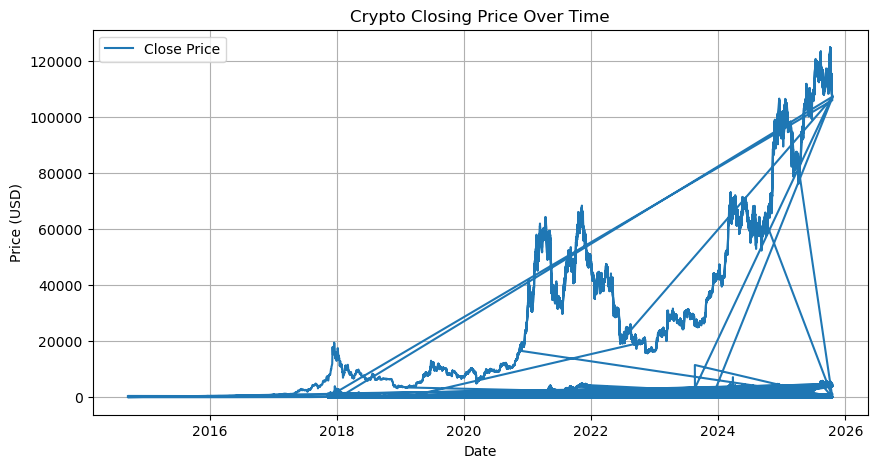

In [19]:
# Simple line chart of closing prices
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Crypto Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

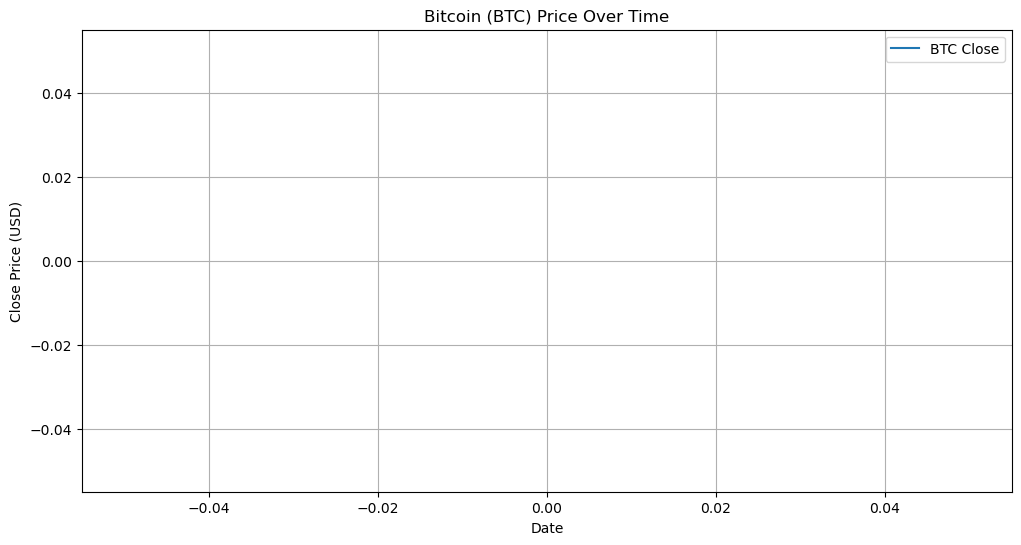

In [21]:
# Filter for Bitcoin
btc = df[df["ticker"] == "BTC"]

# Plot Close price over time
plt.figure(figsize=(12,6))
plt.plot(btc["Date"], btc["Close"], label="BTC Close")
plt.title("Bitcoin (BTC) Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

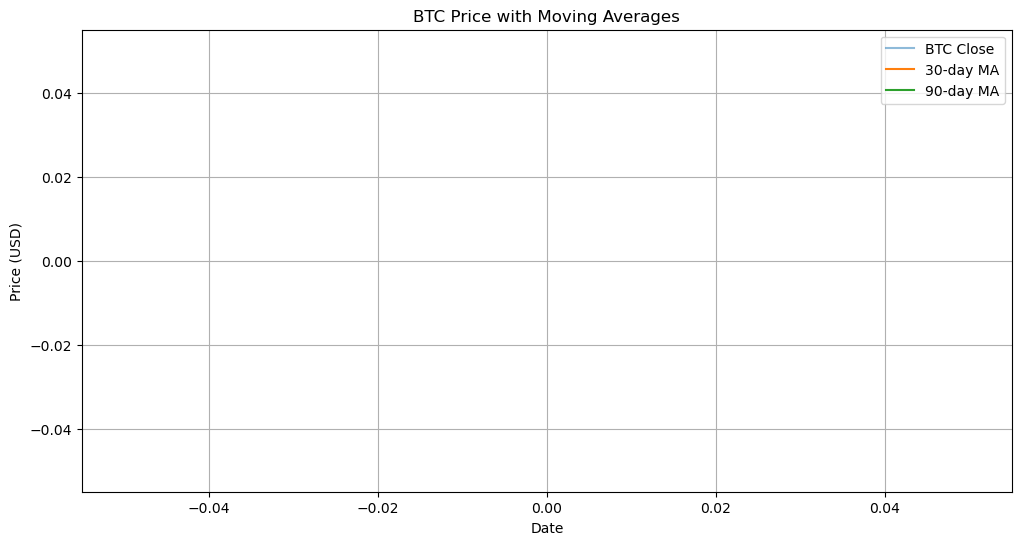

In [25]:
btc["MA30"] = btc["Close"].rolling(window=30).mean()
btc["MA90"] = btc["Close"].rolling(window=90).mean()

plt.figure(figsize=(12,6))
plt.plot(btc["Date"], btc["Close"], alpha=0.5, label="BTC Close")
plt.plot(btc["Date"], btc["MA30"], label="30-day MA")
plt.plot(btc["Date"], btc["MA90"], label="90-day MA")
plt.title("BTC Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

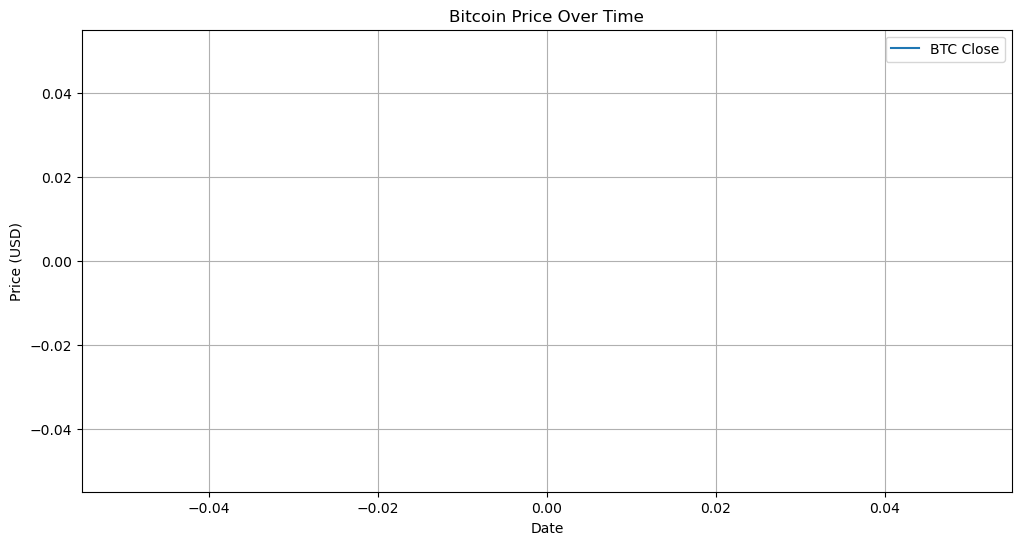

In [27]:
btc = df[df['ticker'] == 'BTC']

plt.figure(figsize=(12, 6))
plt.plot(btc['Date'], btc['Close'], label='BTC Close')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


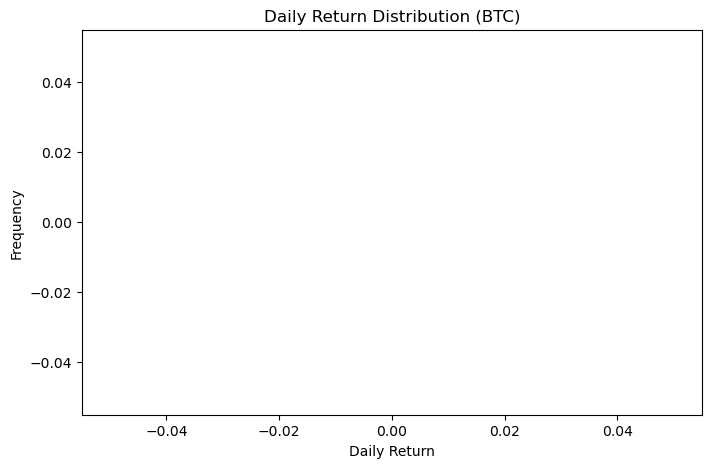

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Return, dtype: float64


In [29]:
btc["Return"] = btc["Close"].pct_change()

import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(btc["Return"].dropna(), bins=100, kde=True)
plt.title("Daily Return Distribution (BTC)")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

# Summary stats
print(btc["Return"].describe())

In [31]:
# Pick top 5 cryptos by volume
top5 = df.groupby("ticker")["Volume"].sum().sort_values(ascending=False).head(5).index.tolist()

# Pivot data to get daily returns of top 5 in one DataFrame
returns_df = df[df["ticker"].isin(top5)].pivot(index="Date", columns="ticker", values="Return")

# Plot correlation heatmap
corr = returns_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Return Correlation of Top 5 Cryptos")
plt.show()

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
returns = pivot_df.pct_change()

# Plot daily returns for Bitcoin
returns['BTC'].plot(figsize=(12, 5), title='BTC Daily Return')
plt.grid(True)
plt.show()


In [ ]:
btc['MA7'] = btc['Close'].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(btc['Date'], btc['Close'], label='BTC Close')
plt.plot(btc['Date'], btc['MA7'], label='7-Day MA', linestyle='--')
plt.title('Bitcoin Close vs 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
summary = df.groupby('ticker')['Close'].describe()
print(summary)
